In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import time
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.utils import shuffle

In [2]:
# Declare Cross-Fold Validation Split / Model Params
N_SPLIT = 10
EPOCHS = 550
LAYERSIZE = 175

In [3]:
# Define Model

def create_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12),
        tf.keras.layers.Dense(LAYERSIZE, 'sigmoid'),
        tf.keras.layers.Dense(LAYERSIZE, 'sigmoid'),
        tf.keras.layers.Dense(10257)
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse')
    
    return model

In [4]:
# Read Data
xdf = pd.read_csv('ML_inputs_tear.csv')
ydf = pd.read_csv('U_tear.csv')

# Adding Constant Parameters to X data
xdf.insert(0, 'c', 6)
xdf.insert(1, 'D', .05)
xdf.insert(2, 'k1', 15)
xdf.insert(3, 'k2', 15)
xdf.insert(4, 'N', 2)
xdf.insert(5, 'kappa_1', .25)
xdf.insert(6, 'kappa_2', .25)
xdf.insert(7, 'kappa_3', .25)

In [5]:
# Convert to Array
x = xdf.to_numpy()
y = ydf.T.to_numpy()

In [6]:
totaltime = []
annmodels = []
test_val = []
acc = []
train_val = []

for train_index, test_index in model_selection.KFold(N_SPLIT, shuffle=True).split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    start = time.time()
    model = create_model()
    model.fit(xtrain, ytrain, epochs = EPOCHS, verbose = 2)
    end = time.time()
    
    totaltime.append(end-start)
    
    annmodels.append(model)
    test_val.append((xtest, ytest))
    train_val.append((xtrain, ytrain))
    acc.append(model.evaluate(xtest, ytest))

Epoch 1/550
7/7 - 1s - loss: 0.0585
Epoch 2/550
7/7 - 0s - loss: 0.0205
Epoch 3/550
7/7 - 0s - loss: 0.0137
Epoch 4/550
7/7 - 0s - loss: 0.0101
Epoch 5/550
7/7 - 0s - loss: 0.0086
Epoch 6/550
7/7 - 0s - loss: 0.0082
Epoch 7/550
7/7 - 0s - loss: 0.0074
Epoch 8/550
7/7 - 0s - loss: 0.0069
Epoch 9/550
7/7 - 0s - loss: 0.0065
Epoch 10/550
7/7 - 0s - loss: 0.0060
Epoch 11/550
7/7 - 0s - loss: 0.0057
Epoch 12/550
7/7 - 0s - loss: 0.0052
Epoch 13/550
7/7 - 0s - loss: 0.0047
Epoch 14/550
7/7 - 0s - loss: 0.0042
Epoch 15/550
7/7 - 0s - loss: 0.0037
Epoch 16/550
7/7 - 0s - loss: 0.0030
Epoch 17/550
7/7 - 0s - loss: 0.0024
Epoch 18/550
7/7 - 0s - loss: 0.0018
Epoch 19/550
7/7 - 0s - loss: 0.0015
Epoch 20/550
7/7 - 0s - loss: 0.0012
Epoch 21/550
7/7 - 0s - loss: 9.9676e-04
Epoch 22/550
7/7 - 0s - loss: 8.5815e-04
Epoch 23/550
7/7 - 0s - loss: 7.5514e-04
Epoch 24/550
7/7 - 0s - loss: 6.7637e-04
Epoch 25/550
7/7 - 0s - loss: 6.0340e-04
Epoch 26/550
7/7 - 0s - loss: 5.5218e-04
Epoch 27/550
7/7 - 0s -

Epoch 201/550
7/7 - 0s - loss: 4.9071e-06
Epoch 202/550
7/7 - 0s - loss: 4.9472e-06
Epoch 203/550
7/7 - 0s - loss: 4.9405e-06
Epoch 204/550
7/7 - 0s - loss: 5.2114e-06
Epoch 205/550
7/7 - 0s - loss: 5.3141e-06
Epoch 206/550
7/7 - 0s - loss: 5.6977e-06
Epoch 207/550
7/7 - 0s - loss: 6.2460e-06
Epoch 208/550
7/7 - 0s - loss: 6.0256e-06
Epoch 209/550
7/7 - 0s - loss: 5.7579e-06
Epoch 210/550
7/7 - 0s - loss: 5.1424e-06
Epoch 211/550
7/7 - 0s - loss: 5.3488e-06
Epoch 212/550
7/7 - 0s - loss: 5.4335e-06
Epoch 213/550
7/7 - 0s - loss: 5.4130e-06
Epoch 214/550
7/7 - 0s - loss: 4.6419e-06
Epoch 215/550
7/7 - 0s - loss: 4.4561e-06
Epoch 216/550
7/7 - 0s - loss: 5.0263e-06
Epoch 217/550
7/7 - 0s - loss: 5.0921e-06
Epoch 218/550
7/7 - 0s - loss: 5.3243e-06
Epoch 219/550
7/7 - 0s - loss: 5.9777e-06
Epoch 220/550
7/7 - 0s - loss: 5.6004e-06
Epoch 221/550
7/7 - 0s - loss: 4.9961e-06
Epoch 222/550
7/7 - 0s - loss: 4.8537e-06
Epoch 223/550
7/7 - 0s - loss: 4.5104e-06
Epoch 224/550
7/7 - 0s - loss: 4.4

7/7 - 0s - loss: 2.6981e-06
Epoch 397/550
7/7 - 0s - loss: 2.2932e-06
Epoch 398/550
7/7 - 0s - loss: 2.6848e-06
Epoch 399/550
7/7 - 0s - loss: 2.6000e-06
Epoch 400/550
7/7 - 0s - loss: 2.6428e-06
Epoch 401/550
7/7 - 0s - loss: 2.1478e-06
Epoch 402/550
7/7 - 0s - loss: 2.2980e-06
Epoch 403/550
7/7 - 0s - loss: 2.4794e-06
Epoch 404/550
7/7 - 0s - loss: 2.3283e-06
Epoch 405/550
7/7 - 0s - loss: 2.1957e-06
Epoch 406/550
7/7 - 0s - loss: 1.8754e-06
Epoch 407/550
7/7 - 0s - loss: 1.8597e-06
Epoch 408/550
7/7 - 0s - loss: 2.1946e-06
Epoch 409/550
7/7 - 0s - loss: 2.8577e-06
Epoch 410/550
7/7 - 0s - loss: 5.9507e-06
Epoch 411/550
7/7 - 0s - loss: 7.8632e-06
Epoch 412/550
7/7 - 0s - loss: 6.2283e-06
Epoch 413/550
7/7 - 0s - loss: 4.1852e-06
Epoch 414/550
7/7 - 0s - loss: 3.9762e-06
Epoch 415/550
7/7 - 0s - loss: 3.0280e-06
Epoch 416/550
7/7 - 0s - loss: 3.8341e-06
Epoch 417/550
7/7 - 0s - loss: 3.6183e-06
Epoch 418/550
7/7 - 0s - loss: 7.5651e-06
Epoch 419/550
7/7 - 0s - loss: 4.8654e-06
Epoch 

7/7 - 0s - loss: 1.8999e-04
Epoch 44/550
7/7 - 0s - loss: 1.8002e-04
Epoch 45/550
7/7 - 0s - loss: 1.7117e-04
Epoch 46/550
7/7 - 0s - loss: 1.6124e-04
Epoch 47/550
7/7 - 0s - loss: 1.5255e-04
Epoch 48/550
7/7 - 0s - loss: 1.4338e-04
Epoch 49/550
7/7 - 0s - loss: 1.3575e-04
Epoch 50/550
7/7 - 0s - loss: 1.3200e-04
Epoch 51/550
7/7 - 0s - loss: 1.2773e-04
Epoch 52/550
7/7 - 0s - loss: 1.1793e-04
Epoch 53/550
7/7 - 0s - loss: 1.1411e-04
Epoch 54/550
7/7 - 0s - loss: 1.1277e-04
Epoch 55/550
7/7 - 0s - loss: 1.0581e-04
Epoch 56/550
7/7 - 0s - loss: 1.0176e-04
Epoch 57/550
7/7 - 0s - loss: 9.8355e-05
Epoch 58/550
7/7 - 0s - loss: 9.5844e-05
Epoch 59/550
7/7 - 0s - loss: 9.5935e-05
Epoch 60/550
7/7 - 0s - loss: 9.6244e-05
Epoch 61/550
7/7 - 0s - loss: 9.4160e-05
Epoch 62/550
7/7 - 0s - loss: 8.5107e-05
Epoch 63/550
7/7 - 0s - loss: 8.6009e-05
Epoch 64/550
7/7 - 0s - loss: 8.2384e-05
Epoch 65/550
7/7 - 0s - loss: 7.8869e-05
Epoch 66/550
7/7 - 0s - loss: 7.7913e-05
Epoch 67/550
7/7 - 0s - loss:

Epoch 240/550
7/7 - 0s - loss: 8.4350e-06
Epoch 241/550
7/7 - 0s - loss: 9.2926e-06
Epoch 242/550
7/7 - 0s - loss: 1.0226e-05
Epoch 243/550
7/7 - 0s - loss: 8.9859e-06
Epoch 244/550
7/7 - 0s - loss: 1.2477e-05
Epoch 245/550
7/7 - 0s - loss: 8.5948e-06
Epoch 246/550
7/7 - 0s - loss: 8.0173e-06
Epoch 247/550
7/7 - 0s - loss: 7.7971e-06
Epoch 248/550
7/7 - 0s - loss: 8.7683e-06
Epoch 249/550
7/7 - 0s - loss: 1.0450e-05
Epoch 250/550
7/7 - 0s - loss: 1.0064e-05
Epoch 251/550
7/7 - 0s - loss: 1.0273e-05
Epoch 252/550
7/7 - 0s - loss: 1.1851e-05
Epoch 253/550
7/7 - 0s - loss: 9.8460e-06
Epoch 254/550
7/7 - 0s - loss: 9.5229e-06
Epoch 255/550
7/7 - 0s - loss: 1.7611e-05
Epoch 256/550
7/7 - 0s - loss: 2.2949e-05
Epoch 257/550
7/7 - 0s - loss: 1.6169e-05
Epoch 258/550
7/7 - 0s - loss: 1.0967e-05
Epoch 259/550
7/7 - 0s - loss: 9.0101e-06
Epoch 260/550
7/7 - 0s - loss: 1.2829e-05
Epoch 261/550
7/7 - 0s - loss: 1.5247e-05
Epoch 262/550
7/7 - 0s - loss: 9.6900e-06
Epoch 263/550
7/7 - 0s - loss: 9.2

7/7 - 0s - loss: 3.1712e-06
Epoch 436/550
7/7 - 0s - loss: 3.5014e-06
Epoch 437/550
7/7 - 0s - loss: 3.5204e-06
Epoch 438/550
7/7 - 0s - loss: 3.7019e-06
Epoch 439/550
7/7 - 0s - loss: 3.8570e-06
Epoch 440/550
7/7 - 0s - loss: 4.7908e-06
Epoch 441/550
7/7 - 0s - loss: 4.5211e-06
Epoch 442/550
7/7 - 0s - loss: 5.9707e-06
Epoch 443/550
7/7 - 0s - loss: 8.6818e-06
Epoch 444/550
7/7 - 0s - loss: 1.3457e-05
Epoch 445/550
7/7 - 0s - loss: 1.4587e-05
Epoch 446/550
7/7 - 0s - loss: 1.5226e-05
Epoch 447/550
7/7 - 0s - loss: 8.6667e-06
Epoch 448/550
7/7 - 0s - loss: 7.2357e-06
Epoch 449/550
7/7 - 0s - loss: 5.0400e-06
Epoch 450/550
7/7 - 0s - loss: 7.0422e-06
Epoch 451/550
7/7 - 0s - loss: 4.4375e-06
Epoch 452/550
7/7 - 0s - loss: 4.5450e-06
Epoch 453/550
7/7 - 0s - loss: 3.6742e-06
Epoch 454/550
7/7 - 0s - loss: 3.8499e-06
Epoch 455/550
7/7 - 0s - loss: 4.6237e-06
Epoch 456/550
7/7 - 0s - loss: 6.1926e-06
Epoch 457/550
7/7 - 0s - loss: 6.3218e-06
Epoch 458/550
7/7 - 0s - loss: 5.6104e-06
Epoch 

7/7 - 0s - loss: 3.5365e-05
Epoch 84/550
7/7 - 0s - loss: 3.5918e-05
Epoch 85/550
7/7 - 0s - loss: 3.3404e-05
Epoch 86/550
7/7 - 0s - loss: 3.3708e-05
Epoch 87/550
7/7 - 0s - loss: 3.1931e-05
Epoch 88/550
7/7 - 0s - loss: 3.1127e-05
Epoch 89/550
7/7 - 0s - loss: 3.1233e-05
Epoch 90/550
7/7 - 0s - loss: 3.0570e-05
Epoch 91/550
7/7 - 0s - loss: 2.9115e-05
Epoch 92/550
7/7 - 0s - loss: 2.8285e-05
Epoch 93/550
7/7 - 0s - loss: 2.8072e-05
Epoch 94/550
7/7 - 0s - loss: 2.7357e-05
Epoch 95/550
7/7 - 0s - loss: 2.6789e-05
Epoch 96/550
7/7 - 0s - loss: 2.6766e-05
Epoch 97/550
7/7 - 0s - loss: 2.5854e-05
Epoch 98/550
7/7 - 0s - loss: 2.5911e-05
Epoch 99/550
7/7 - 0s - loss: 2.5049e-05
Epoch 100/550
7/7 - 0s - loss: 2.5513e-05
Epoch 101/550
7/7 - 0s - loss: 2.4866e-05
Epoch 102/550
7/7 - 0s - loss: 2.4363e-05
Epoch 103/550
7/7 - 0s - loss: 2.3626e-05
Epoch 104/550
7/7 - 0s - loss: 2.3641e-05
Epoch 105/550
7/7 - 0s - loss: 2.3216e-05
Epoch 106/550
7/7 - 0s - loss: 2.2309e-05
Epoch 107/550
7/7 - 0s

Epoch 279/550
7/7 - 0s - loss: 5.1833e-06
Epoch 280/550
7/7 - 0s - loss: 7.6105e-06
Epoch 281/550
7/7 - 0s - loss: 7.1060e-06
Epoch 282/550
7/7 - 0s - loss: 1.0760e-05
Epoch 283/550
7/7 - 0s - loss: 7.1608e-06
Epoch 284/550
7/7 - 0s - loss: 5.0572e-06
Epoch 285/550
7/7 - 0s - loss: 4.0535e-06
Epoch 286/550
7/7 - 0s - loss: 3.4267e-06
Epoch 287/550
7/7 - 0s - loss: 3.6112e-06
Epoch 288/550
7/7 - 0s - loss: 3.0140e-06
Epoch 289/550
7/7 - 0s - loss: 3.4234e-06
Epoch 290/550
7/7 - 0s - loss: 3.2636e-06
Epoch 291/550
7/7 - 0s - loss: 3.0793e-06
Epoch 292/550
7/7 - 0s - loss: 3.6046e-06
Epoch 293/550
7/7 - 0s - loss: 3.9973e-06
Epoch 294/550
7/7 - 0s - loss: 3.5114e-06
Epoch 295/550
7/7 - 0s - loss: 2.9331e-06
Epoch 296/550
7/7 - 0s - loss: 2.8332e-06
Epoch 297/550
7/7 - 0s - loss: 2.9551e-06
Epoch 298/550
7/7 - 0s - loss: 3.3402e-06
Epoch 299/550
7/7 - 0s - loss: 4.1115e-06
Epoch 300/550
7/7 - 0s - loss: 4.4638e-06
Epoch 301/550
7/7 - 0s - loss: 7.4258e-06
Epoch 302/550
7/7 - 0s - loss: 5.9

7/7 - 0s - loss: 1.7183e-06
Epoch 475/550
7/7 - 0s - loss: 1.6503e-06
Epoch 476/550
7/7 - 0s - loss: 1.9988e-06
Epoch 477/550
7/7 - 0s - loss: 1.9565e-06
Epoch 478/550
7/7 - 0s - loss: 2.0615e-06
Epoch 479/550
7/7 - 0s - loss: 3.1219e-06
Epoch 480/550
7/7 - 0s - loss: 2.4402e-06
Epoch 481/550
7/7 - 0s - loss: 4.2456e-06
Epoch 482/550
7/7 - 0s - loss: 4.2117e-06
Epoch 483/550
7/7 - 0s - loss: 5.5559e-06
Epoch 484/550
7/7 - 0s - loss: 1.0092e-05
Epoch 485/550
7/7 - 0s - loss: 1.8477e-05
Epoch 486/550
7/7 - 0s - loss: 3.7915e-06
Epoch 487/550
7/7 - 0s - loss: 3.0578e-06
Epoch 488/550
7/7 - 0s - loss: 4.0885e-06
Epoch 489/550
7/7 - 0s - loss: 3.7149e-06
Epoch 490/550
7/7 - 0s - loss: 3.1341e-06
Epoch 491/550
7/7 - 0s - loss: 3.6081e-06
Epoch 492/550
7/7 - 0s - loss: 2.0292e-06
Epoch 493/550
7/7 - 0s - loss: 2.1916e-06
Epoch 494/550
7/7 - 0s - loss: 2.3796e-06
Epoch 495/550
7/7 - 0s - loss: 2.5338e-06
Epoch 496/550
7/7 - 0s - loss: 1.8072e-06
Epoch 497/550
7/7 - 0s - loss: 2.4756e-06
Epoch 

Epoch 122/550
7/7 - 0s - loss: 1.6640e-05
Epoch 123/550
7/7 - 0s - loss: 1.6198e-05
Epoch 124/550
7/7 - 0s - loss: 1.5721e-05
Epoch 125/550
7/7 - 0s - loss: 1.5077e-05
Epoch 126/550
7/7 - 0s - loss: 1.4985e-05
Epoch 127/550
7/7 - 0s - loss: 1.4343e-05
Epoch 128/550
7/7 - 0s - loss: 1.4351e-05
Epoch 129/550
7/7 - 0s - loss: 1.4159e-05
Epoch 130/550
7/7 - 0s - loss: 1.3731e-05
Epoch 131/550
7/7 - 0s - loss: 1.4148e-05
Epoch 132/550
7/7 - 0s - loss: 1.4301e-05
Epoch 133/550
7/7 - 0s - loss: 1.3876e-05
Epoch 134/550
7/7 - 0s - loss: 1.3463e-05
Epoch 135/550
7/7 - 0s - loss: 1.2977e-05
Epoch 136/550
7/7 - 0s - loss: 1.2965e-05
Epoch 137/550
7/7 - 0s - loss: 1.2697e-05
Epoch 138/550
7/7 - 0s - loss: 1.2763e-05
Epoch 139/550
7/7 - 0s - loss: 1.2258e-05
Epoch 140/550
7/7 - 0s - loss: 1.2121e-05
Epoch 141/550
7/7 - 0s - loss: 1.1665e-05
Epoch 142/550
7/7 - 0s - loss: 1.1560e-05
Epoch 143/550
7/7 - 0s - loss: 1.1697e-05
Epoch 144/550
7/7 - 0s - loss: 1.1966e-05
Epoch 145/550
7/7 - 0s - loss: 1.1

Epoch 318/550
7/7 - 0s - loss: 4.9643e-06
Epoch 319/550
7/7 - 0s - loss: 4.6842e-06
Epoch 320/550
7/7 - 0s - loss: 4.1634e-06
Epoch 321/550
7/7 - 0s - loss: 3.7708e-06
Epoch 322/550
7/7 - 0s - loss: 3.5751e-06
Epoch 323/550
7/7 - 0s - loss: 5.0478e-06
Epoch 324/550
7/7 - 0s - loss: 5.1147e-06
Epoch 325/550
7/7 - 0s - loss: 4.5399e-06
Epoch 326/550
7/7 - 0s - loss: 3.6512e-06
Epoch 327/550
7/7 - 0s - loss: 3.8697e-06
Epoch 328/550
7/7 - 0s - loss: 3.9681e-06
Epoch 329/550
7/7 - 0s - loss: 3.1590e-06
Epoch 330/550
7/7 - 0s - loss: 3.6686e-06
Epoch 331/550
7/7 - 0s - loss: 3.6066e-06
Epoch 332/550
7/7 - 0s - loss: 3.1821e-06
Epoch 333/550
7/7 - 0s - loss: 2.9734e-06
Epoch 334/550
7/7 - 0s - loss: 3.4357e-06
Epoch 335/550
7/7 - 0s - loss: 2.7116e-06
Epoch 336/550
7/7 - 0s - loss: 2.7667e-06
Epoch 337/550
7/7 - 0s - loss: 3.0533e-06
Epoch 338/550
7/7 - 0s - loss: 3.3570e-06
Epoch 339/550
7/7 - 0s - loss: 3.3090e-06
Epoch 340/550
7/7 - 0s - loss: 3.7463e-06
Epoch 341/550
7/7 - 0s - loss: 3.0

7/7 - 0s - loss: 2.6076e-06
Epoch 514/550
7/7 - 0s - loss: 2.4289e-06
Epoch 515/550
7/7 - 0s - loss: 2.1507e-06
Epoch 516/550
7/7 - 0s - loss: 1.6625e-06
Epoch 517/550
7/7 - 0s - loss: 1.5458e-06
Epoch 518/550
7/7 - 0s - loss: 1.5951e-06
Epoch 519/550
7/7 - 0s - loss: 1.7507e-06
Epoch 520/550
7/7 - 0s - loss: 1.7063e-06
Epoch 521/550
7/7 - 0s - loss: 1.5325e-06
Epoch 522/550
7/7 - 0s - loss: 2.1056e-06
Epoch 523/550
7/7 - 0s - loss: 2.6925e-06
Epoch 524/550
7/7 - 0s - loss: 2.0856e-06
Epoch 525/550
7/7 - 0s - loss: 1.9499e-06
Epoch 526/550
7/7 - 0s - loss: 1.5853e-06
Epoch 527/550
7/7 - 0s - loss: 2.2599e-06
Epoch 528/550
7/7 - 0s - loss: 3.7303e-06
Epoch 529/550
7/7 - 0s - loss: 3.5264e-06
Epoch 530/550
7/7 - 0s - loss: 4.3754e-06
Epoch 531/550
7/7 - 0s - loss: 3.8184e-06
Epoch 532/550
7/7 - 0s - loss: 6.1035e-06
Epoch 533/550
7/7 - 0s - loss: 2.8987e-06
Epoch 534/550
7/7 - 0s - loss: 2.5005e-06
Epoch 535/550
7/7 - 0s - loss: 2.0532e-06
Epoch 536/550
7/7 - 0s - loss: 2.6214e-06
Epoch 

7/7 - 0s - loss: 1.5217e-05
Epoch 163/550
7/7 - 0s - loss: 1.4909e-05
Epoch 164/550
7/7 - 0s - loss: 1.6135e-05
Epoch 165/550
7/7 - 0s - loss: 1.8059e-05
Epoch 166/550
7/7 - 0s - loss: 2.1373e-05
Epoch 167/550
7/7 - 0s - loss: 1.7833e-05
Epoch 168/550
7/7 - 0s - loss: 1.6404e-05
Epoch 169/550
7/7 - 0s - loss: 1.6369e-05
Epoch 170/550
7/7 - 0s - loss: 1.3881e-05
Epoch 171/550
7/7 - 0s - loss: 1.3662e-05
Epoch 172/550
7/7 - 0s - loss: 1.3249e-05
Epoch 173/550
7/7 - 0s - loss: 1.3684e-05
Epoch 174/550
7/7 - 0s - loss: 1.3550e-05
Epoch 175/550
7/7 - 0s - loss: 2.1572e-05
Epoch 176/550
7/7 - 0s - loss: 2.3323e-05
Epoch 177/550
7/7 - 0s - loss: 1.7785e-05
Epoch 178/550
7/7 - 0s - loss: 1.3836e-05
Epoch 179/550
7/7 - 0s - loss: 1.2297e-05
Epoch 180/550
7/7 - 0s - loss: 1.2001e-05
Epoch 181/550
7/7 - 0s - loss: 1.1998e-05
Epoch 182/550
7/7 - 0s - loss: 1.1616e-05
Epoch 183/550
7/7 - 0s - loss: 1.0778e-05
Epoch 184/550
7/7 - 0s - loss: 1.1631e-05
Epoch 185/550
7/7 - 0s - loss: 1.5939e-05
Epoch 

Epoch 358/550
7/7 - 0s - loss: 1.6048e-05
Epoch 359/550
7/7 - 0s - loss: 1.2424e-05
Epoch 360/550
7/7 - 0s - loss: 9.1123e-06
Epoch 361/550
7/7 - 0s - loss: 7.1219e-06
Epoch 362/550
7/7 - 0s - loss: 1.2916e-05
Epoch 363/550
7/7 - 0s - loss: 5.8428e-06
Epoch 364/550
7/7 - 0s - loss: 4.0435e-06
Epoch 365/550
7/7 - 0s - loss: 3.6644e-06
Epoch 366/550
7/7 - 0s - loss: 2.9950e-06
Epoch 367/550
7/7 - 0s - loss: 3.2021e-06
Epoch 368/550
7/7 - 0s - loss: 4.4893e-06
Epoch 369/550
7/7 - 0s - loss: 4.7554e-06
Epoch 370/550
7/7 - 0s - loss: 3.8173e-06
Epoch 371/550
7/7 - 0s - loss: 2.6999e-06
Epoch 372/550
7/7 - 0s - loss: 3.0907e-06
Epoch 373/550
7/7 - 0s - loss: 3.9930e-06
Epoch 374/550
7/7 - 0s - loss: 3.5491e-06
Epoch 375/550
7/7 - 0s - loss: 3.7363e-06
Epoch 376/550
7/7 - 0s - loss: 3.9629e-06
Epoch 377/550
7/7 - 0s - loss: 3.7618e-06
Epoch 378/550
7/7 - 0s - loss: 3.7737e-06
Epoch 379/550
7/7 - 0s - loss: 3.2189e-06
Epoch 380/550
7/7 - 0s - loss: 3.4803e-06
Epoch 381/550
7/7 - 0s - loss: 3.3

1/1 [==============================] - 0s 58ms/step - loss: 4.9927e-06
Epoch 1/550
7/7 - 0s - loss: 0.0574
Epoch 2/550
7/7 - 0s - loss: 0.0217
Epoch 3/550
7/7 - 0s - loss: 0.0136
Epoch 4/550
7/7 - 0s - loss: 0.0100
Epoch 5/550
7/7 - 0s - loss: 0.0081
Epoch 6/550
7/7 - 0s - loss: 0.0076
Epoch 7/550
7/7 - 0s - loss: 0.0068
Epoch 8/550
7/7 - 0s - loss: 0.0063
Epoch 9/550
7/7 - 0s - loss: 0.0060
Epoch 10/550
7/7 - 0s - loss: 0.0057
Epoch 11/550
7/7 - 0s - loss: 0.0056
Epoch 12/550
7/7 - 0s - loss: 0.0054
Epoch 13/550
7/7 - 0s - loss: 0.0051
Epoch 14/550
7/7 - 0s - loss: 0.0050
Epoch 15/550
7/7 - 0s - loss: 0.0048
Epoch 16/550
7/7 - 0s - loss: 0.0046
Epoch 17/550
7/7 - 0s - loss: 0.0044
Epoch 18/550
7/7 - 0s - loss: 0.0040
Epoch 19/550
7/7 - 0s - loss: 0.0036
Epoch 20/550
7/7 - 0s - loss: 0.0032
Epoch 21/550
7/7 - 0s - loss: 0.0029
Epoch 22/550
7/7 - 0s - loss: 0.0024
Epoch 23/550
7/7 - 0s - loss: 0.0019
Epoch 24/550
7/7 - 0s - loss: 0.0015
Epoch 25/550
7/7 - 0s - loss: 0.0012
Epoch 26/550


Epoch 200/550
7/7 - 0s - loss: 7.1725e-06
Epoch 201/550
7/7 - 0s - loss: 7.6581e-06
Epoch 202/550
7/7 - 0s - loss: 8.0649e-06
Epoch 203/550
7/7 - 0s - loss: 1.1015e-05
Epoch 204/550
7/7 - 0s - loss: 1.2870e-05
Epoch 205/550
7/7 - 0s - loss: 8.8302e-06
Epoch 206/550
7/7 - 0s - loss: 1.1429e-05
Epoch 207/550
7/7 - 0s - loss: 1.0684e-05
Epoch 208/550
7/7 - 0s - loss: 1.1340e-05
Epoch 209/550
7/7 - 0s - loss: 1.8227e-05
Epoch 210/550
7/7 - 0s - loss: 1.2910e-05
Epoch 211/550
7/7 - 0s - loss: 1.6818e-05
Epoch 212/550
7/7 - 0s - loss: 1.0626e-05
Epoch 213/550
7/7 - 0s - loss: 6.8764e-06
Epoch 214/550
7/7 - 0s - loss: 6.9225e-06
Epoch 215/550
7/7 - 0s - loss: 6.4323e-06
Epoch 216/550
7/7 - 0s - loss: 7.1577e-06
Epoch 217/550
7/7 - 0s - loss: 6.6714e-06
Epoch 218/550
7/7 - 0s - loss: 6.4755e-06
Epoch 219/550
7/7 - 0s - loss: 6.6578e-06
Epoch 220/550
7/7 - 0s - loss: 6.1688e-06
Epoch 221/550
7/7 - 0s - loss: 5.6510e-06
Epoch 222/550
7/7 - 0s - loss: 5.7097e-06
Epoch 223/550
7/7 - 0s - loss: 5.7

7/7 - 0s - loss: 2.4648e-06
Epoch 396/550
7/7 - 0s - loss: 4.8103e-06
Epoch 397/550
7/7 - 0s - loss: 9.0395e-06
Epoch 398/550
7/7 - 0s - loss: 6.3431e-06
Epoch 399/550
7/7 - 0s - loss: 3.9697e-06
Epoch 400/550
7/7 - 0s - loss: 2.7492e-06
Epoch 401/550
7/7 - 0s - loss: 2.8157e-06
Epoch 402/550
7/7 - 0s - loss: 3.8961e-06
Epoch 403/550
7/7 - 0s - loss: 3.2096e-06
Epoch 404/550
7/7 - 0s - loss: 2.8848e-06
Epoch 405/550
7/7 - 0s - loss: 2.5604e-06
Epoch 406/550
7/7 - 0s - loss: 3.4502e-06
Epoch 407/550
7/7 - 0s - loss: 4.1424e-06
Epoch 408/550
7/7 - 0s - loss: 3.6815e-06
Epoch 409/550
7/7 - 0s - loss: 3.7281e-06
Epoch 410/550
7/7 - 0s - loss: 3.3381e-06
Epoch 411/550
7/7 - 0s - loss: 2.7234e-06
Epoch 412/550
7/7 - 0s - loss: 2.7522e-06
Epoch 413/550
7/7 - 0s - loss: 2.4937e-06
Epoch 414/550
7/7 - 0s - loss: 1.9315e-06
Epoch 415/550
7/7 - 0s - loss: 2.7500e-06
Epoch 416/550
7/7 - 0s - loss: 2.9963e-06
Epoch 417/550
7/7 - 0s - loss: 2.8639e-06
Epoch 418/550
7/7 - 0s - loss: 2.7915e-06
Epoch 

7/7 - 0s - loss: 8.9625e-04
Epoch 25/550
7/7 - 0s - loss: 8.0947e-04
Epoch 26/550
7/7 - 0s - loss: 7.5838e-04
Epoch 27/550
7/7 - 0s - loss: 7.0112e-04
Epoch 28/550
7/7 - 0s - loss: 6.5434e-04
Epoch 29/550
7/7 - 0s - loss: 6.2318e-04
Epoch 30/550
7/7 - 0s - loss: 5.8467e-04
Epoch 31/550
7/7 - 0s - loss: 5.3535e-04
Epoch 32/550
7/7 - 0s - loss: 4.9854e-04
Epoch 33/550
7/7 - 0s - loss: 4.4208e-04
Epoch 34/550
7/7 - 0s - loss: 4.0105e-04
Epoch 35/550
7/7 - 0s - loss: 3.5749e-04
Epoch 36/550
7/7 - 0s - loss: 3.3400e-04
Epoch 37/550
7/7 - 0s - loss: 3.0120e-04
Epoch 38/550
7/7 - 0s - loss: 2.6592e-04
Epoch 39/550
7/7 - 0s - loss: 2.3700e-04
Epoch 40/550
7/7 - 0s - loss: 2.2347e-04
Epoch 41/550
7/7 - 0s - loss: 2.0759e-04
Epoch 42/550
7/7 - 0s - loss: 1.8874e-04
Epoch 43/550
7/7 - 0s - loss: 1.7414e-04
Epoch 44/550
7/7 - 0s - loss: 1.6069e-04
Epoch 45/550
7/7 - 0s - loss: 1.5087e-04
Epoch 46/550
7/7 - 0s - loss: 1.4203e-04
Epoch 47/550
7/7 - 0s - loss: 1.3606e-04
Epoch 48/550
7/7 - 0s - loss:

7/7 - 0s - loss: 7.3585e-06
Epoch 222/550
7/7 - 0s - loss: 7.1571e-06
Epoch 223/550
7/7 - 0s - loss: 8.0415e-06
Epoch 224/550
7/7 - 0s - loss: 7.2874e-06
Epoch 225/550
7/7 - 0s - loss: 5.9947e-06
Epoch 226/550
7/7 - 0s - loss: 5.7117e-06
Epoch 227/550
7/7 - 0s - loss: 5.6200e-06
Epoch 228/550
7/7 - 0s - loss: 5.6905e-06
Epoch 229/550
7/7 - 0s - loss: 5.7183e-06
Epoch 230/550
7/7 - 0s - loss: 6.2124e-06
Epoch 231/550
7/7 - 0s - loss: 5.9907e-06
Epoch 232/550
7/7 - 0s - loss: 5.9698e-06
Epoch 233/550
7/7 - 0s - loss: 6.5200e-06
Epoch 234/550
7/7 - 0s - loss: 5.5680e-06
Epoch 235/550
7/7 - 0s - loss: 5.3353e-06
Epoch 236/550
7/7 - 0s - loss: 5.4427e-06
Epoch 237/550
7/7 - 0s - loss: 5.4264e-06
Epoch 238/550
7/7 - 0s - loss: 5.5693e-06
Epoch 239/550
7/7 - 0s - loss: 5.8819e-06
Epoch 240/550
7/7 - 0s - loss: 5.0478e-06
Epoch 241/550
7/7 - 0s - loss: 5.1002e-06
Epoch 242/550
7/7 - 0s - loss: 5.1252e-06
Epoch 243/550
7/7 - 0s - loss: 5.4718e-06
Epoch 244/550
7/7 - 0s - loss: 5.9967e-06
Epoch 

Epoch 417/550
7/7 - 0s - loss: 6.4161e-06
Epoch 418/550
7/7 - 0s - loss: 7.6877e-06
Epoch 419/550
7/7 - 0s - loss: 6.5175e-06
Epoch 420/550
7/7 - 0s - loss: 6.6071e-06
Epoch 421/550
7/7 - 0s - loss: 1.9433e-05
Epoch 422/550
7/7 - 0s - loss: 6.3883e-05
Epoch 423/550
7/7 - 0s - loss: 4.5960e-05
Epoch 424/550
7/7 - 0s - loss: 2.4686e-05
Epoch 425/550
7/7 - 0s - loss: 2.9724e-05
Epoch 426/550
7/7 - 0s - loss: 3.4249e-05
Epoch 427/550
7/7 - 0s - loss: 3.1603e-05
Epoch 428/550
7/7 - 0s - loss: 1.4157e-05
Epoch 429/550
7/7 - 0s - loss: 7.0378e-06
Epoch 430/550
7/7 - 0s - loss: 4.3648e-06
Epoch 431/550
7/7 - 0s - loss: 4.5405e-06
Epoch 432/550
7/7 - 0s - loss: 3.6267e-06
Epoch 433/550
7/7 - 0s - loss: 3.4036e-06
Epoch 434/550
7/7 - 0s - loss: 2.7862e-06
Epoch 435/550
7/7 - 0s - loss: 2.7954e-06
Epoch 436/550
7/7 - 0s - loss: 2.6107e-06
Epoch 437/550
7/7 - 0s - loss: 2.5163e-06
Epoch 438/550
7/7 - 0s - loss: 2.3822e-06
Epoch 439/550
7/7 - 0s - loss: 2.9718e-06
Epoch 440/550
7/7 - 0s - loss: 4.9

Epoch 47/550
7/7 - 0s - loss: 1.0981e-04
Epoch 48/550
7/7 - 0s - loss: 1.0470e-04
Epoch 49/550
7/7 - 0s - loss: 1.0176e-04
Epoch 50/550
7/7 - 0s - loss: 9.8017e-05
Epoch 51/550
7/7 - 0s - loss: 9.4771e-05
Epoch 52/550
7/7 - 0s - loss: 9.0701e-05
Epoch 53/550
7/7 - 0s - loss: 8.7637e-05
Epoch 54/550
7/7 - 0s - loss: 8.2640e-05
Epoch 55/550
7/7 - 0s - loss: 8.0687e-05
Epoch 56/550
7/7 - 0s - loss: 7.7929e-05
Epoch 57/550
7/7 - 0s - loss: 7.7404e-05
Epoch 58/550
7/7 - 0s - loss: 7.2014e-05
Epoch 59/550
7/7 - 0s - loss: 6.9092e-05
Epoch 60/550
7/7 - 0s - loss: 6.5595e-05
Epoch 61/550
7/7 - 0s - loss: 6.3357e-05
Epoch 62/550
7/7 - 0s - loss: 6.2503e-05
Epoch 63/550
7/7 - 0s - loss: 6.0659e-05
Epoch 64/550
7/7 - 0s - loss: 5.9099e-05
Epoch 65/550
7/7 - 0s - loss: 5.6109e-05
Epoch 66/550
7/7 - 0s - loss: 5.3984e-05
Epoch 67/550
7/7 - 0s - loss: 5.3225e-05
Epoch 68/550
7/7 - 0s - loss: 5.2264e-05
Epoch 69/550
7/7 - 0s - loss: 5.0085e-05
Epoch 70/550
7/7 - 0s - loss: 4.7739e-05
Epoch 71/550
7/7

7/7 - 0s - loss: 4.7975e-06
Epoch 244/550
7/7 - 0s - loss: 5.4994e-06
Epoch 245/550
7/7 - 0s - loss: 4.7619e-06
Epoch 246/550
7/7 - 0s - loss: 4.7315e-06
Epoch 247/550
7/7 - 0s - loss: 7.2645e-06
Epoch 248/550
7/7 - 0s - loss: 8.9729e-06
Epoch 249/550
7/7 - 0s - loss: 8.6459e-06
Epoch 250/550
7/7 - 0s - loss: 1.1751e-05
Epoch 251/550
7/7 - 0s - loss: 1.6282e-05
Epoch 252/550
7/7 - 0s - loss: 1.3276e-05
Epoch 253/550
7/7 - 0s - loss: 1.0468e-05
Epoch 254/550
7/7 - 0s - loss: 6.1083e-06
Epoch 255/550
7/7 - 0s - loss: 4.8629e-06
Epoch 256/550
7/7 - 0s - loss: 4.8151e-06
Epoch 257/550
7/7 - 0s - loss: 5.9028e-06
Epoch 258/550
7/7 - 0s - loss: 5.8079e-06
Epoch 259/550
7/7 - 0s - loss: 4.9170e-06
Epoch 260/550
7/7 - 0s - loss: 5.1299e-06
Epoch 261/550
7/7 - 0s - loss: 4.9975e-06
Epoch 262/550
7/7 - 0s - loss: 4.6917e-06
Epoch 263/550
7/7 - 0s - loss: 4.5952e-06
Epoch 264/550
7/7 - 0s - loss: 4.6015e-06
Epoch 265/550
7/7 - 0s - loss: 6.0566e-06
Epoch 266/550
7/7 - 0s - loss: 9.5846e-06
Epoch 

Epoch 439/550
7/7 - 0s - loss: 3.2598e-06
Epoch 440/550
7/7 - 0s - loss: 3.3040e-06
Epoch 441/550
7/7 - 0s - loss: 2.8485e-06
Epoch 442/550
7/7 - 0s - loss: 3.6065e-06
Epoch 443/550
7/7 - 0s - loss: 2.9159e-06
Epoch 444/550
7/7 - 0s - loss: 2.4178e-06
Epoch 445/550
7/7 - 0s - loss: 2.3461e-06
Epoch 446/550
7/7 - 0s - loss: 2.2582e-06
Epoch 447/550
7/7 - 0s - loss: 2.7044e-06
Epoch 448/550
7/7 - 0s - loss: 3.2537e-06
Epoch 449/550
7/7 - 0s - loss: 3.5017e-06
Epoch 450/550
7/7 - 0s - loss: 3.2472e-06
Epoch 451/550
7/7 - 0s - loss: 2.5052e-06
Epoch 452/550
7/7 - 0s - loss: 2.4484e-06
Epoch 453/550
7/7 - 0s - loss: 2.1769e-06
Epoch 454/550
7/7 - 0s - loss: 4.4213e-06
Epoch 455/550
7/7 - 0s - loss: 2.8419e-06
Epoch 456/550
7/7 - 0s - loss: 2.3605e-06
Epoch 457/550
7/7 - 0s - loss: 3.3322e-06
Epoch 458/550
7/7 - 0s - loss: 2.4004e-06
Epoch 459/550
7/7 - 0s - loss: 2.8727e-06
Epoch 460/550
7/7 - 0s - loss: 2.4067e-06
Epoch 461/550
7/7 - 0s - loss: 2.3864e-06
Epoch 462/550
7/7 - 0s - loss: 2.8

Epoch 69/550
7/7 - 0s - loss: 4.4730e-05
Epoch 70/550
7/7 - 0s - loss: 4.2809e-05
Epoch 71/550
7/7 - 0s - loss: 4.0932e-05
Epoch 72/550
7/7 - 0s - loss: 4.0975e-05
Epoch 73/550
7/7 - 0s - loss: 3.9681e-05
Epoch 74/550
7/7 - 0s - loss: 3.8029e-05
Epoch 75/550
7/7 - 0s - loss: 3.6792e-05
Epoch 76/550
7/7 - 0s - loss: 3.6195e-05
Epoch 77/550
7/7 - 0s - loss: 3.4911e-05
Epoch 78/550
7/7 - 0s - loss: 3.3806e-05
Epoch 79/550
7/7 - 0s - loss: 3.2588e-05
Epoch 80/550
7/7 - 0s - loss: 3.1565e-05
Epoch 81/550
7/7 - 0s - loss: 3.0609e-05
Epoch 82/550
7/7 - 0s - loss: 3.0000e-05
Epoch 83/550
7/7 - 0s - loss: 2.8873e-05
Epoch 84/550
7/7 - 0s - loss: 2.8409e-05
Epoch 85/550
7/7 - 0s - loss: 2.7658e-05
Epoch 86/550
7/7 - 0s - loss: 2.8051e-05
Epoch 87/550
7/7 - 0s - loss: 2.7982e-05
Epoch 88/550
7/7 - 0s - loss: 2.6865e-05
Epoch 89/550
7/7 - 0s - loss: 2.5965e-05
Epoch 90/550
7/7 - 0s - loss: 2.5111e-05
Epoch 91/550
7/7 - 0s - loss: 2.4907e-05
Epoch 92/550
7/7 - 0s - loss: 2.4534e-05
Epoch 93/550
7/7

Epoch 265/550
7/7 - 0s - loss: 2.9620e-06
Epoch 266/550
7/7 - 0s - loss: 2.9512e-06
Epoch 267/550
7/7 - 0s - loss: 3.4780e-06
Epoch 268/550
7/7 - 0s - loss: 4.0796e-06
Epoch 269/550
7/7 - 0s - loss: 3.2309e-06
Epoch 270/550
7/7 - 0s - loss: 2.8926e-06
Epoch 271/550
7/7 - 0s - loss: 2.9398e-06
Epoch 272/550
7/7 - 0s - loss: 2.9708e-06
Epoch 273/550
7/7 - 0s - loss: 3.4010e-06
Epoch 274/550
7/7 - 0s - loss: 3.6389e-06
Epoch 275/550
7/7 - 0s - loss: 4.4694e-06
Epoch 276/550
7/7 - 0s - loss: 5.0840e-06
Epoch 277/550
7/7 - 0s - loss: 7.2549e-06
Epoch 278/550
7/7 - 0s - loss: 7.7471e-06
Epoch 279/550
7/7 - 0s - loss: 4.6288e-06
Epoch 280/550
7/7 - 0s - loss: 4.4524e-06
Epoch 281/550
7/7 - 0s - loss: 3.9106e-06
Epoch 282/550
7/7 - 0s - loss: 3.9412e-06
Epoch 283/550
7/7 - 0s - loss: 3.6359e-06
Epoch 284/550
7/7 - 0s - loss: 4.6794e-06
Epoch 285/550
7/7 - 0s - loss: 6.1894e-06
Epoch 286/550
7/7 - 0s - loss: 4.8807e-06
Epoch 287/550
7/7 - 0s - loss: 3.7495e-06
Epoch 288/550
7/7 - 0s - loss: 4.1

Epoch 461/550
7/7 - 0s - loss: 3.7294e-06
Epoch 462/550
7/7 - 0s - loss: 4.5980e-06
Epoch 463/550
7/7 - 0s - loss: 6.4321e-06
Epoch 464/550
7/7 - 0s - loss: 3.0423e-06
Epoch 465/550
7/7 - 0s - loss: 2.2584e-06
Epoch 466/550
7/7 - 0s - loss: 4.2983e-06
Epoch 467/550
7/7 - 0s - loss: 4.7752e-06
Epoch 468/550
7/7 - 0s - loss: 4.5369e-06
Epoch 469/550
7/7 - 0s - loss: 4.6851e-06
Epoch 470/550
7/7 - 0s - loss: 2.7699e-06
Epoch 471/550
7/7 - 0s - loss: 2.2831e-06
Epoch 472/550
7/7 - 0s - loss: 2.1873e-06
Epoch 473/550
7/7 - 0s - loss: 2.4024e-06
Epoch 474/550
7/7 - 0s - loss: 2.7735e-06
Epoch 475/550
7/7 - 0s - loss: 2.7721e-06
Epoch 476/550
7/7 - 0s - loss: 2.4794e-06
Epoch 477/550
7/7 - 0s - loss: 2.6678e-06
Epoch 478/550
7/7 - 0s - loss: 2.6468e-06
Epoch 479/550
7/7 - 0s - loss: 2.7094e-06
Epoch 480/550
7/7 - 0s - loss: 1.9965e-06
Epoch 481/550
7/7 - 0s - loss: 1.5753e-06
Epoch 482/550
7/7 - 0s - loss: 1.6715e-06
Epoch 483/550
7/7 - 0s - loss: 1.7307e-06
Epoch 484/550
7/7 - 0s - loss: 1.8

Epoch 92/550
7/7 - 0s - loss: 2.5647e-05
Epoch 93/550
7/7 - 0s - loss: 2.5899e-05
Epoch 94/550
7/7 - 0s - loss: 2.5212e-05
Epoch 95/550
7/7 - 0s - loss: 2.4328e-05
Epoch 96/550
7/7 - 0s - loss: 2.4024e-05
Epoch 97/550
7/7 - 0s - loss: 2.3977e-05
Epoch 98/550
7/7 - 0s - loss: 2.3229e-05
Epoch 99/550
7/7 - 0s - loss: 2.3036e-05
Epoch 100/550
7/7 - 0s - loss: 2.3344e-05
Epoch 101/550
7/7 - 0s - loss: 2.1974e-05
Epoch 102/550
7/7 - 0s - loss: 2.2508e-05
Epoch 103/550
7/7 - 0s - loss: 2.2203e-05
Epoch 104/550
7/7 - 0s - loss: 2.1284e-05
Epoch 105/550
7/7 - 0s - loss: 2.1082e-05
Epoch 106/550
7/7 - 0s - loss: 2.0366e-05
Epoch 107/550
7/7 - 0s - loss: 2.0096e-05
Epoch 108/550
7/7 - 0s - loss: 1.9468e-05
Epoch 109/550
7/7 - 0s - loss: 1.9501e-05
Epoch 110/550
7/7 - 0s - loss: 1.9068e-05
Epoch 111/550
7/7 - 0s - loss: 1.9731e-05
Epoch 112/550
7/7 - 0s - loss: 1.8497e-05
Epoch 113/550
7/7 - 0s - loss: 1.8240e-05
Epoch 114/550
7/7 - 0s - loss: 1.8055e-05
Epoch 115/550
7/7 - 0s - loss: 1.7542e-05


7/7 - 0s - loss: 3.2709e-06
Epoch 288/550
7/7 - 0s - loss: 3.0123e-06
Epoch 289/550
7/7 - 0s - loss: 2.9907e-06
Epoch 290/550
7/7 - 0s - loss: 2.8581e-06
Epoch 291/550
7/7 - 0s - loss: 2.9814e-06
Epoch 292/550
7/7 - 0s - loss: 3.2107e-06
Epoch 293/550
7/7 - 0s - loss: 3.7280e-06
Epoch 294/550
7/7 - 0s - loss: 4.0108e-06
Epoch 295/550
7/7 - 0s - loss: 3.5592e-06
Epoch 296/550
7/7 - 0s - loss: 3.9911e-06
Epoch 297/550
7/7 - 0s - loss: 4.5329e-06
Epoch 298/550
7/7 - 0s - loss: 3.3256e-06
Epoch 299/550
7/7 - 0s - loss: 4.9296e-06
Epoch 300/550
7/7 - 0s - loss: 4.4777e-06
Epoch 301/550
7/7 - 0s - loss: 4.3830e-06
Epoch 302/550
7/7 - 0s - loss: 3.6075e-06
Epoch 303/550
7/7 - 0s - loss: 4.7135e-06
Epoch 304/550
7/7 - 0s - loss: 1.1133e-05
Epoch 305/550
7/7 - 0s - loss: 1.1946e-05
Epoch 306/550
7/7 - 0s - loss: 7.4201e-06
Epoch 307/550
7/7 - 0s - loss: 1.0461e-05
Epoch 308/550
7/7 - 0s - loss: 1.3677e-05
Epoch 309/550
7/7 - 0s - loss: 1.1749e-05
Epoch 310/550
7/7 - 0s - loss: 9.0544e-06
Epoch 

Epoch 483/550
7/7 - 0s - loss: 1.6119e-06
Epoch 484/550
7/7 - 0s - loss: 1.7547e-06
Epoch 485/550
7/7 - 0s - loss: 1.6256e-06
Epoch 486/550
7/7 - 0s - loss: 2.0435e-06
Epoch 487/550
7/7 - 0s - loss: 3.7035e-06
Epoch 488/550
7/7 - 0s - loss: 2.6459e-06
Epoch 489/550
7/7 - 0s - loss: 3.9571e-06
Epoch 490/550
7/7 - 0s - loss: 3.9790e-06
Epoch 491/550
7/7 - 0s - loss: 4.9247e-06
Epoch 492/550
7/7 - 0s - loss: 2.8010e-06
Epoch 493/550
7/7 - 0s - loss: 2.1613e-06
Epoch 494/550
7/7 - 0s - loss: 1.6143e-06
Epoch 495/550
7/7 - 0s - loss: 2.3077e-06
Epoch 496/550
7/7 - 0s - loss: 3.8268e-06
Epoch 497/550
7/7 - 0s - loss: 3.3720e-06
Epoch 498/550
7/7 - 0s - loss: 3.9642e-06
Epoch 499/550
7/7 - 0s - loss: 4.1910e-06
Epoch 500/550
7/7 - 0s - loss: 4.2387e-06
Epoch 501/550
7/7 - 0s - loss: 5.1544e-06
Epoch 502/550
7/7 - 0s - loss: 2.0780e-06
Epoch 503/550
7/7 - 0s - loss: 1.6897e-06
Epoch 504/550
7/7 - 0s - loss: 1.8059e-06
Epoch 505/550
7/7 - 0s - loss: 2.0415e-06
Epoch 506/550
7/7 - 0s - loss: 3.8

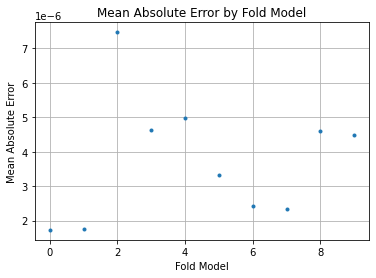

In [7]:
plt.plot(acc, '.')
plt.xlabel("Fold Model")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error by Fold Model")
plt.grid(True)

In [8]:
# Generate Total L^2 Error Data per fold
l2err = []
valerr = []
trainerr = []

for i in range(len(annmodels)):
    
    # Generate Predictions
    pred = annmodels[i].predict(train_val[i][0])
    predt = annmodels[i].predict(test_val[i][0])
    
    #Calculate Error
    tmpsum = 0
    for j in range(len(predt)): # Validation
        Norm1 = np.linalg.norm(test_val[i][1][j] - predt[j], 2)
        Norm2 = np.linalg.norm(predt[j], 2)
        tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
    
    valerr.append(math.sqrt(tmpsum))
    
    tmpsum2 = 0
    for k in range(len(pred)): # Training
        Norm1 = np.linalg.norm(train_val[i][1][k] - pred[k], 2)
        Norm2 = np.linalg.norm(pred[k], 2)
        tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
        tmpsum2 = tmpsum2 + ((Norm1**2)/(Norm2**2))
    
    trainerr.append(math.sqrt(tmpsum2))
    
    # Insert Error
    l2err.append(math.sqrt(tmpsum))

([<matplotlib.axis.XTick at 0x7fbb50429310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

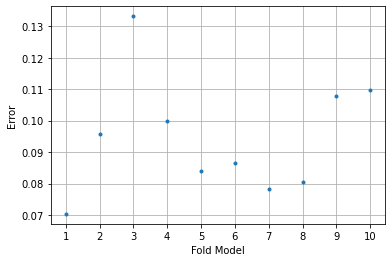

In [9]:
plt.plot(np.arange(1, 11, step=1), l2err, '.')
plt.xlabel("Fold Model")
plt.ylabel("Error")
plt.grid(True)
plt.xticks(np.arange(1, 11, step=1))

In [10]:
print(f"Average Frobenius Error for All Models: {np.mean(l2err)} (+- {np.std(l2err)})")
print(f"Mean Average Error for All Models: {np.mean(acc)} (+- {np.std(acc)})")

Average Frobenius Error for All Models: 0.09461579590111809 (+- 0.017768481067688868)
Mean Average Error for All Models: 3.776902417484962e-06 (+- 1.7141742056222236e-06)


In [11]:
pltstore = []

tmpsum = 0
pred = annmodels[np.argmin(l2err)].predict(train_val[np.argmin(l2err)][0])
for k in range(len(pred)):
    Norm1 = np.linalg.norm(train_val[np.argmin(l2err)][1][k] - pred[k], 2)
    Norm2 = np.linalg.norm(pred[k], 2)
    pltstore.append(Norm1/Norm2)
    tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
    
pred = annmodels[np.argmin(l2err)].predict(test_val[np.argmin(l2err)][0])
for j in range(len(pred)):
        Norm1 = np.linalg.norm(test_val[np.argmin(l2err)][1][j] - pred[j], 2)
        Norm2 = np.linalg.norm(pred[j], 2)
        pltstore.append(Norm1/Norm2)
        tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
    
math.sqrt(tmpsum)

0.07035383491315766

In [12]:
xplot = np.concatenate((train_val[np.argmin(l2err)][0], test_val[np.argmin(l2err)][0]), axis=0)

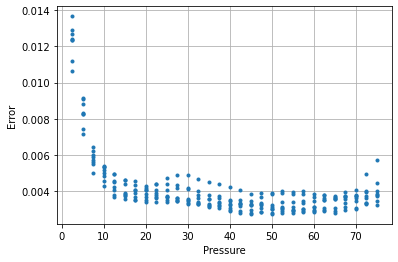

In [13]:
#Export Data Here

plt.plot(xplot[:,11], pltstore, '.')
plt.xlabel("Pressure")
plt.ylabel("Error")
plt.grid(True)

In [14]:
sum(totaltime)

60.14722800254822

In [15]:
# for i in range(len(annmodels)):
#     string = "model" + str(i) + ".h5"
#     annmodels[i].save(string)

In [16]:
export = pd.DataFrame({'online time': totaltime})
# export.to_csv('onlineTime.csv', encoding = 'utf-8', index=False)